<a href="https://colab.research.google.com/github/bwdshufe/fukuilab_facial_recognition/blob/main/face2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 完整的Colab代码
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch

!pip install torch torchvision ninja imageio imageio-ffmpeg

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 24.12 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
# 1. 克隆项目
!git clone https://github.com/rolux/stylegan2encoder.git
%cd stylegan2encoder

# 2. 安装依赖
!pip install -q scipy dlib

# 3. 下载人脸关键点模型
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

# 4. 修复PIL兼容性问题
!sed -i 's/PIL.Image.ANTIALIAS/PIL.Image.LANCZOS/g' ffhq_dataset/face_alignment.py

# 5. 创建文件夹
!mkdir -p raw_images aligned_images

# 6. 上传图像
from google.colab import files
print("请上传你的原始人脸图像:")
uploaded = files.upload()

# 7. 移动上传的文件到 raw_images 文件夹
import shutil
for filename in uploaded.keys():
    shutil.move(filename, f'raw_images/{filename}')
    print(f"已移动: {filename}")

# 8. 对齐图像
!python align_images.py raw_images/ aligned_images/

# 9. 查看对齐结果
!ls -lh aligned_images/

# 10. 显示对齐后的图像
from IPython.display import Image, display
import glob
for img in glob.glob('aligned_images/*.png'):
    print(f"\n对齐后: {img}")
    display(Image(img))

# 11. 克隆StyleGAN2-ADA-PyTorch进行投影
%cd ..
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch
!pip install -q ninja

# 12. 获取对齐后的图像文件名
aligned_images = glob.glob('../stylegan2encoder/aligned_images/*.png')
if aligned_images:
    target_image = aligned_images[0]
    print(f"\n将投影图像: {target_image}")

    # 13. 执行投影
    !python projector.py \
      --outdir=out \
      --target={target_image} \
      --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl \
      --num-steps=6000

    # 14. 显示投影结果
    print("\n投影完成！结果:")
    for result in sorted(glob.glob('out/*.png')):
        display(Image(result))
else:
    print("未找到对齐后的图像，检查对齐过程是否有错误")

Cloning into 'stylegan2encoder'...
remote: Enumerating objects: 111, done.
remote: Total 111 (delta 0), reused 0 (delta 0), pack-reused 111 (from 1)
Receiving objects: 100% (111/111), 1.55 MiB | 4.46 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/pixel2style2pixel/stylegan2encoder/stylegan2encoder
--2025-10-21 06:45:13--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-10-21 06:45:13--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M

Saving u1raw.JPG to u1raw.JPG
已移动: u1raw.JPG
2025-10-21 06:45:28.031844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761029128.066296    2805 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761029128.077056    2805 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761029128.103288    2805 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761029128.103336    2805 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761029128.103345    2805 comp

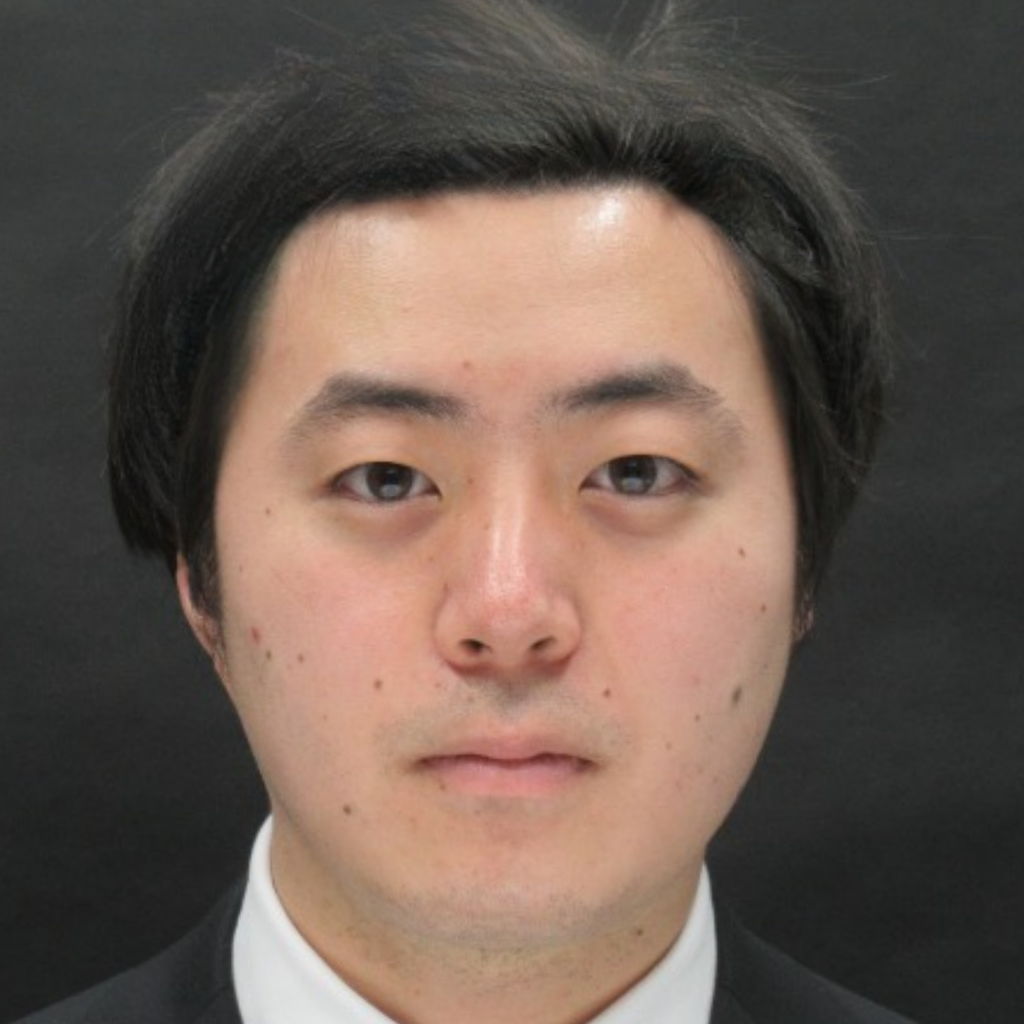

/content/pixel2style2pixel/stylegan2encoder
Cloning into 'pixel2style2pixel'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 418 (delta 0), reused 2 (delta 0), pack-reused 414 (from 1)
Receiving objects: 100% (418/418), 92.94 MiB | 33.98 MiB/s, done.
Resolving deltas: 100% (147/147), done.
/content/pixel2style2pixel/stylegan2encoder/pixel2style2pixel
ERROR: Could not find a version that satisfies the requirement torch==1.9.0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0)
ERROR: No matching distribution found for torch==1.9.0

下载预训练的pSp模型...


Downloading...
From (original): https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0
From (redirected): https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0&confirm=t&uuid=d5fc3a55-f526-4327-9b57-514b6e31afd4
To: /content/pixel2style2pixel/stylegan2encoder/pixel2style2pixel/psp_ffhq_encode.pt
100%|██████████| 1.20G/1.20G [00:15<00:00, 75.2MB/s]



开始投影 1 张图像...
方法: Richardson et al. (2021) - Encoding in Style
特点: 使用LPIPS损失 + PPL优化
W1021 06:46:34.105000 3128 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1021 06:46:34.105000 3128 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.
W1021 06:47:18.241000 3128 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1021 06:47:18.241000 3128 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.
Loading pSp from checkpoint: psp_ffhq_encode.pt
Loading dataset for ffhq_encode
100% 1/1 [00:03<00:00,  3.30s/it]
Runtime 1.6342+-0.0000

检查输出文件...
total 12K
drwxr-xr-x 2 root root 4.0K Oct 21 06:48 inference_coupled
drwxr-xr-x 2 root root 4.0K Oct 21 06:48 inference_results
-rw-r--r-- 1

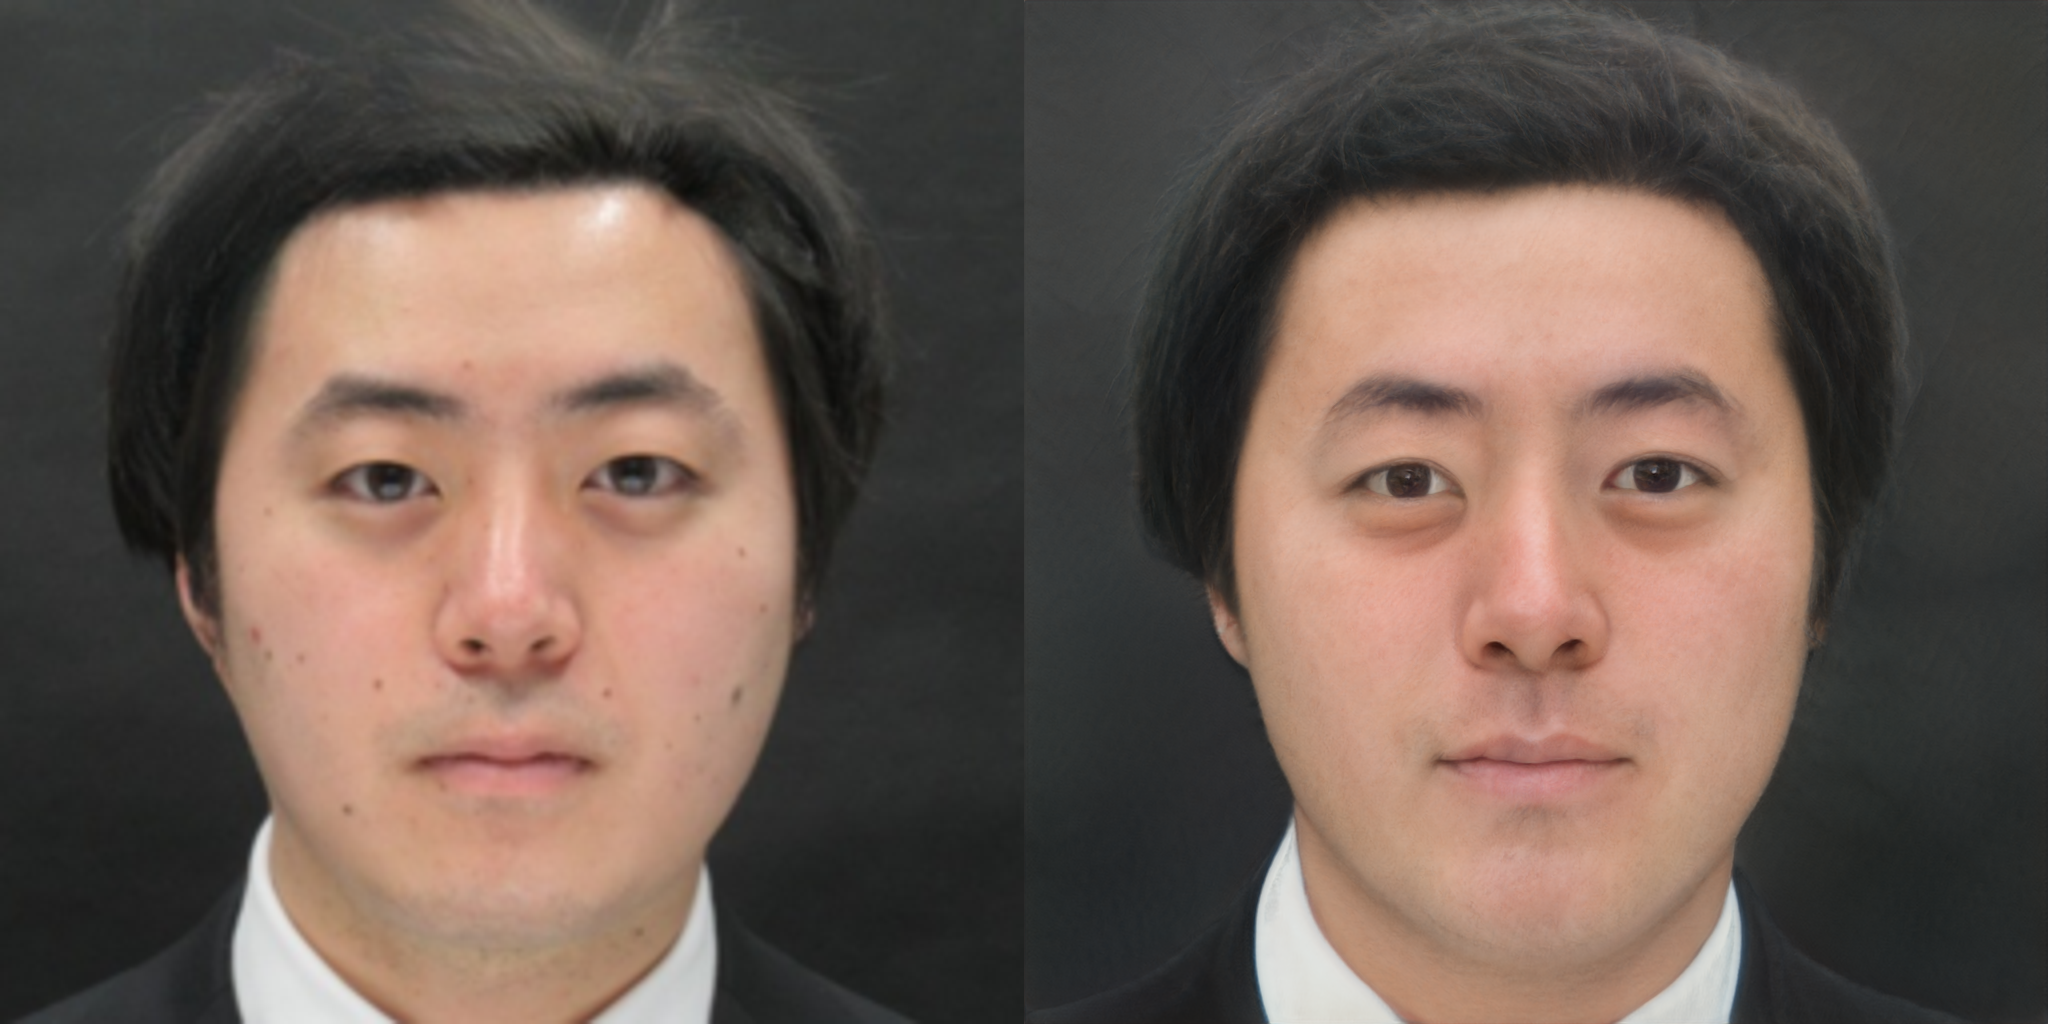


projection_output/inference_results/u1raw_01.png


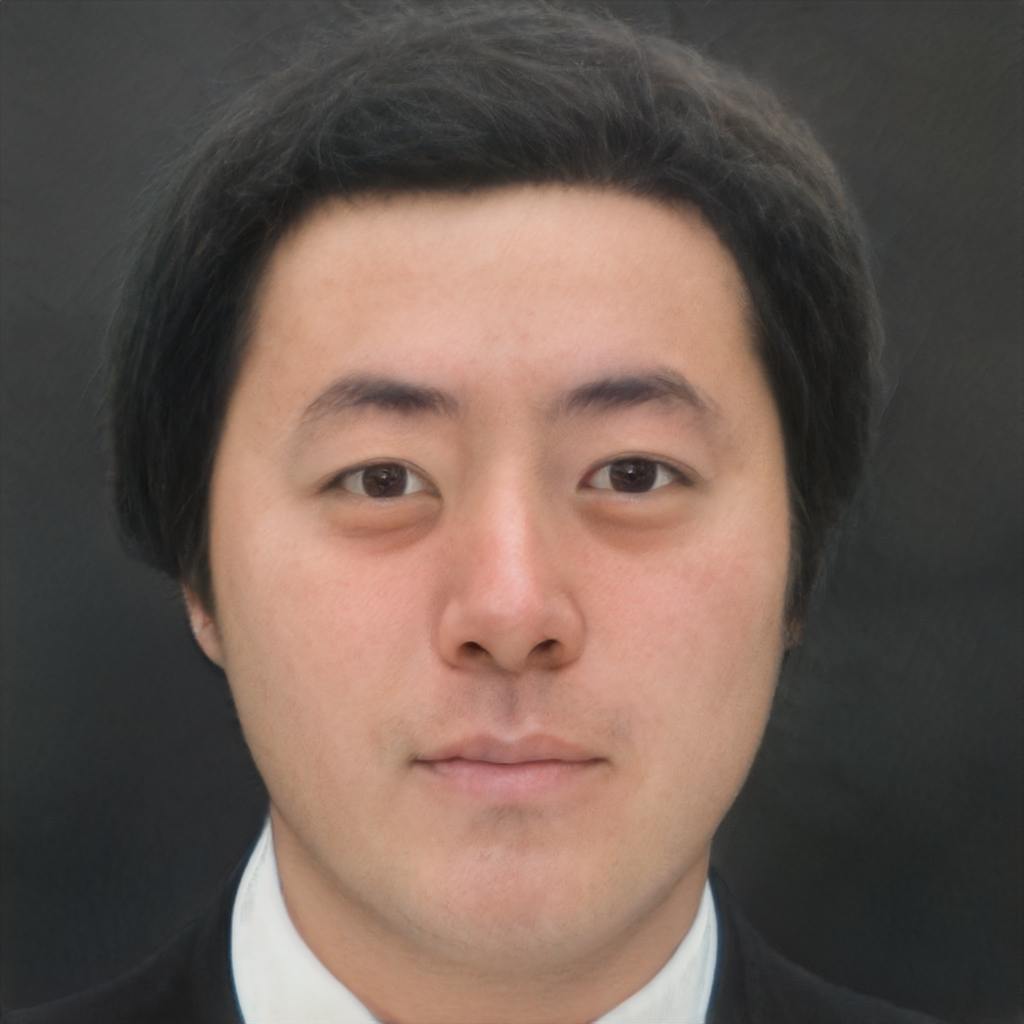


是否下载结果？
  adding: projection_output/ (stored 0%)
  adding: projection_output/inference_coupled/ (stored 0%)
  adding: projection_output/inference_coupled/u1raw_01.png (deflated 0%)
  adding: projection_output/stats.txt (stored 0%)
  adding: projection_output/inference_results/ (stored 0%)
  adding: projection_output/inference_results/u1raw_01.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# 1. 克隆项目（用于图像对齐）
!git clone https://github.com/rolux/stylegan2encoder.git
%cd stylegan2encoder

# 2. 安装依赖
!pip install -q scipy dlib

# 3. 下载人脸关键点模型
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

# 4. 修复PIL兼容性问题
!sed -i 's/PIL.Image.ANTIALIAS/PIL.Image.LANCZOS/g' ffhq_dataset/face_alignment.py

# 5. 创建文件夹
!mkdir -p raw_images aligned_images

# 6. 上传图像
from google.colab import files
print("请上传你的原始人脸图像:")
uploaded = files.upload()

# 7. 移动上传的文件到 raw_images 文件夹
import shutil
for filename in uploaded.keys():
    shutil.move(filename, f'raw_images/{filename}')
    print(f"已移动: {filename}")

# 8. 对齐图像
!python align_images.py raw_images/ aligned_images/

# 9. 查看对齐结果
!ls -lh aligned_images/

# 10. 显示对齐后的图像
from IPython.display import Image, display
import glob
for img in glob.glob('aligned_images/*.png'):
    print(f"\n对齐后: {img}")
    display(Image(img))

# ===== 修复版本：使用论文相同的方法 =====

# 11. 返回上级目录
%cd ..

# 12. 卸载冲突的datasets库（这是问题根源）
!pip uninstall -y datasets

# 13. 克隆 pSp encoder
!git clone https://github.com/eladrich/pixel2style2pixel.git
%cd pixel2style2pixel

# 14. 安装正确的依赖
!pip install -q torch==1.9.0 torchvision==0.10.0
!pip install -q lpips
!pip install -q ninja
!pip install -q gdown
!pip install -q matplotlib
!pip install -q scikit-image

# 15. 下载预训练模型
print("\n下载预训练的pSp模型...")
import gdown
model_url = 'https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0'
gdown.download(model_url, 'psp_ffhq_encode.pt', quiet=False)

# 16. 准备输入图像
!mkdir -p inference_input
aligned_images = glob.glob('../stylegan2encoder/aligned_images/*.png')
if aligned_images:
    for img in aligned_images:
        shutil.copy(img, 'inference_input/')

    print(f"\n开始投影 {len(aligned_images)} 张图像...")
    print("方法: Richardson et al. (2021) - Encoding in Style")
    print("特点: 使用LPIPS损失 + PPL优化")

    # 17. 执行投影
    !python scripts/inference.py \
      --exp_dir=projection_output \
      --checkpoint_path=psp_ffhq_encode.pt \
      --data_path=inference_input \
      --test_batch_size=1 \
      --test_workers=1 \
      --couple_outputs

    # 18. 检查输出
    print("\n检查输出文件...")
    !ls -lh projection_output/
    !ls -lh projection_output/inference_results/ 2>/dev/null || echo "未找到inference_results文件夹"

    # 19. 显示结果
    result_files = glob.glob('projection_output/**/*.jpg', recursive=True) + \
                   glob.glob('projection_output/**/*.png', recursive=True)

    if result_files:
        print(f"\n✓ 投影成功！找到 {len(result_files)} 个结果文件")
        for result in sorted(result_files):
            print(f"\n{result}")
            display(Image(result))
    else:
        print("\n⚠️ 未找到结果文件，尝试调试...")
        # 显示详细的目录结构
        !find projection_output -type f

else:
    print("未找到对齐后的图像")

# 20. 下载结果
print("\n是否下载结果？")
!zip -r psp_projection.zip projection_output/
files.download('psp_projection.zip')

In [ ]:
!ls -lh out/

total 164M
-rw-r--r-- 1 root root  37K Oct 14 07:53 projected_w.npz
-rw-r--r-- 1 root root 162M Oct 14 07:53 proj.mp4
-rw-r--r-- 1 root root 1.1M Oct 14 07:53 proj.png
-rw-r--r-- 1 root root 1.4M Oct 14 07:53 target.png


In [ ]:
from google.colab import files
files.download('out/proj.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>